In [ ]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [ ]:
irisdata = pd.read_csv(url, names=names)

In [ ]:
X = irisdata.iloc[:, 0:4]
# Takes first 5th columns and assign them to variable "Y". Object dtype refers to strings.
y = irisdata.select_dtypes(include=[object])

In [ ]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)  
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predictions = mlp.predict(X_test)

In [ ]:
print(predictions)

[0 0 0 0 2 1 2 1 0 1 1 2 1 1 2 2 2 2 0 0 0 1 1 0 1 2 0 1 1 0]


[[11  0  0]
 [ 0 10  1]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.91      0.91        11
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



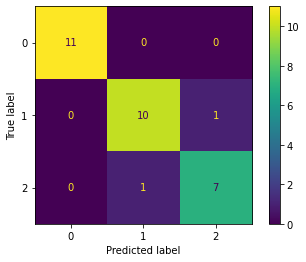

In [ ]:
# Last thing: evaluation of algorithm performance in classifying flowers
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp,X_test,y_test)